In [2]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
src, configs, n_params_, losses_accs_ = load(open('train_projection=64_epochs=100_lr=5e-4_sess=1.pickle', 'rb'))

In [5]:
losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

In [6]:
pd.set_option('display.max_rows', 1000)

In [13]:
configs[8], losses_accs_df[8]

({'channels': 14,
  'depth': 2,
  'dim': 64,
  'dim_head': 128,
  'dropout': 0.2,
  'emb_dropout': 0,
  'heads': 8,
  'image_size': (1, 300),
  'mlp_dim': 128,
  'num_classes': 8,
  'patch_size': (1, 20),
  'pool': 'cls',
  'use_cls_token': True},
     train_loss  train_acc  val_loss   val_acc  test_loss  test_acc
 0     1.680026   0.542797  1.536536  0.561045   1.655221  0.513873
 1     1.690636   0.542797  1.541897  0.561045   1.657638  0.513873
 2     1.694313   0.542797  1.541796  0.561045   1.663102  0.513873
 3     1.697157   0.542797  1.542503  0.561045   1.663515  0.513873
 4     1.680527   0.542797  1.536469  0.561045   1.659108  0.513873
 5     1.695379   0.542797  1.543499  0.561045   1.658764  0.513873
 6     1.695258   0.542797  1.543782  0.561045   1.659478  0.513873
 7     1.687130   0.542797  1.539478  0.561045   1.656348  0.513873
 8     1.675539   0.542797  1.538472  0.561045   1.648105  0.513873
 9     1.687297   0.542797  1.538992  0.561045   1.657223  0.513873
 10 

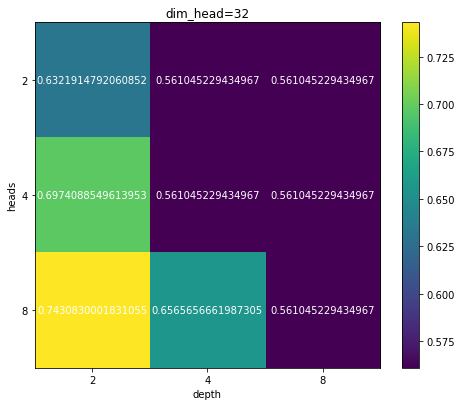

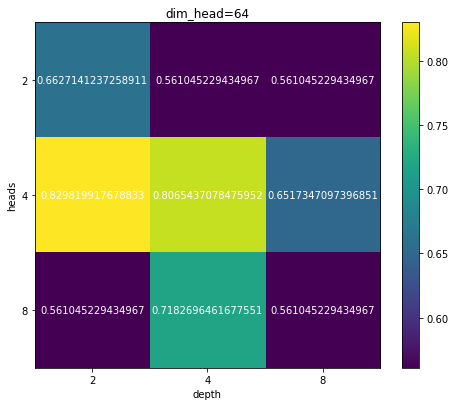

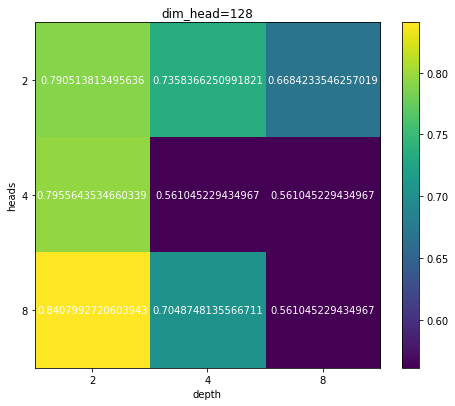

In [9]:
heads = [2, 4, 8]
depth = [2, 4, 8,]

for dim_head in [32, 64, 128]:

    scores = np.empty((3,3))
    for i, config in enumerate(configs):
        if config['dim_head'] == dim_head:
            scores[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', )#cmap=plt.cm.hot)
    plt.ylabel('heads')
    plt.xlabel('depth')
    plt.colorbar()
    plt.xticks(np.arange(len(heads)), heads)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title(f'dim_head={dim_head}')
    for i in range(len(heads)):
        for j in range(len(depth)):
            text = plt.text(j, i, scores[i, j],
                           ha="center", va="center", color="w")
    plt.show()

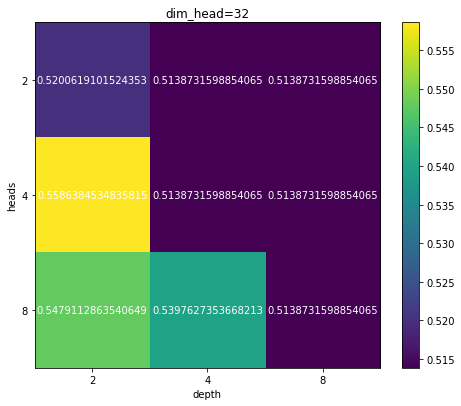

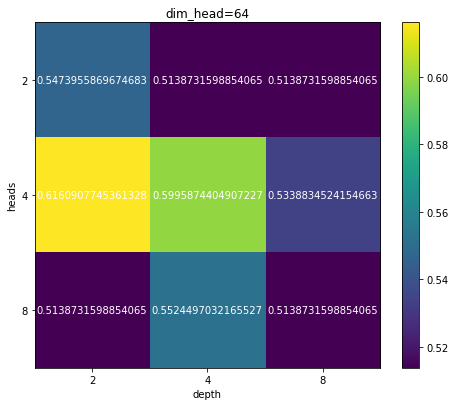

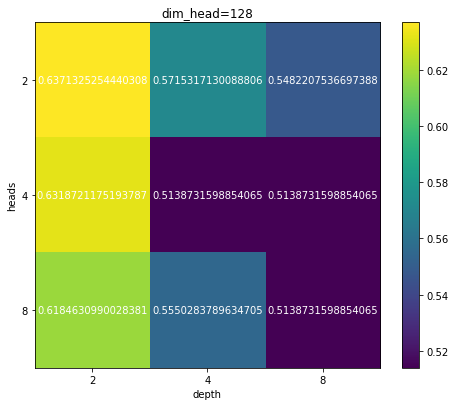

In [14]:
heads = [2, 4, 8]
depth = [2, 4, 8,]

for dim_head in [32, 64, 128]:

    scores = np.empty((3,3))
    for i, config in enumerate(configs):
        if config['dim_head'] == dim_head:
            scores[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', )#cmap=plt.cm.hot)
    plt.ylabel('heads')
    plt.xlabel('depth')
    plt.colorbar()
    plt.xticks(np.arange(len(heads)), heads)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title(f'dim_head={dim_head}')
    for i in range(len(heads)):
        for j in range(len(depth)):
            text = plt.text(j, i, scores[i, j],
                           ha="center", va="center", color="w")
    plt.show()